In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D, Input
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

In [5]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [6]:
model = Sequential()
model.add(Input((28,28,1)))
model.add(Conv2D(32,kernel_size=3,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=3,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64,kernel_size=3,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=3,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [8]:
model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 20s 23ms/step - loss: 0.2629 - accuracy: 0.9197 - val_loss: 1.7317 - val_accuracy: 0.5659
Epoch 2/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0857 - accuracy: 0.9747 - val_loss: 0.0412 - val_accuracy: 0.9877
Epoch 3/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0675 - accuracy: 0.9805 - val_loss: 0.0391 - val_accuracy: 0.9885
Epoch 4/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0556 - accuracy: 0.9842 - val_loss: 0.0303 - val_accuracy: 0.9904
Epoch 5/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0481 - accuracy: 0.9863 - val_loss: 0.0189 - val_accuracy: 0.9940
Epoch 6/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0424 - accuracy: 0.9879 - val_loss: 0.0240 - val_accuracy: 0.9930
Epoch 7/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0399 - accuracy: 0.9881 - val_loss: 0.0265 - val_accuracy:

In [9]:
# Read the input image (make sure it's a binary image)
image = cv2.imread('/content/a_car_000160.png', cv2.IMREAD_GRAYSCALE)

# Apply thresholding to create a binary image
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

# Use connectedComponentsWithStats to obtain labels and bounding boxes
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=4)

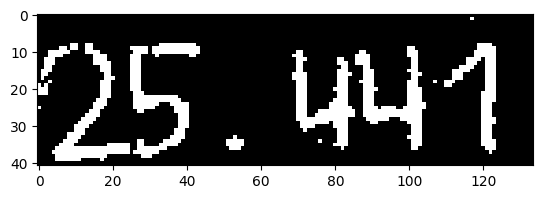

In [11]:
plt.imshow(binary_image, cmap='gray')

In [12]:
x_y = []
number_images = []
# Iterate through each connected component
for label in range(1, num_labels):#num_labels
    # Get the bounding box of the current connected component
    x, y, w, h = stats[label][:4]

    # Crop the connected component using the bounding box
    connected_component = np.uint8(binary_image[y:y+h, x:x+w])
    x_y.append((x, y))
    number_images.append(connected_component)

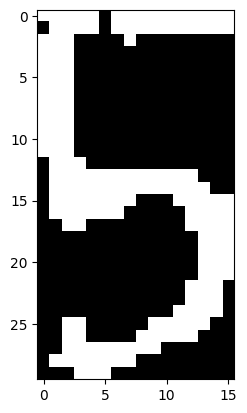

In [22]:
plt.imshow(number_images[6], cmap='gray')

In [13]:
combined = list(zip(x_y, number_images))
sorted_combined = sorted(combined, key=lambda x: x[0][0])
x_y, number_images = zip(*sorted_combined)

In [15]:
text = ""
for img, loc in zip(number_images, x_y):
    if img.shape[0] > 8 and img.shape[1] > 8:
        img = img.astype('float32') / 255
        img = cv2.copyMakeBorder(img, 5,5,5,5,cv2.BORDER_CONSTANT,value=0)
        new_img = cv2.resize(img, dsize=(28, 28))
        new_img = np.expand_dims(new_img, axis=2)
        new_img = np.expand_dims(new_img, axis=0)
        number = str(np.argmax(model.predict(new_img, verbose=0)))
        text = text + number
print(text)

25447


In [23]:
model.save_weights('weight.h5')